## Tercer Desafío: `Daruich`, Nicolas Alberto
----

### **Resumen:**

Este estudio se centra en un conjunto de datos que abarca diversas variables de salud y demográficas, con un enfoque particular en el síndrome metabólico. El dataset incluye información crucial como la edad, género, estado civil, niveles de ingresos, origen étnico, mediciones antropométricas como la circunferencia de la cintura y el Índice de Masa Corporal (IMC), así como parámetros bioquímicos como los niveles de glucosa en la sangre, el colesterol de lipoproteínas de alta densidad (HDL), triglicéridos y otros indicadores clave.

El síndrome metabólico, representado como una variable binaria, constituye un aspecto fundamental de interés en este análisis. Se busca explorar las interrelaciones entre las variables mencionadas y la presencia del síndrome metabólico, con el objetivo de identificar patrones, correlaciones y factores de riesgo asociados. Esta investigación aprovecha las técnicas avanzadas de ciencia de datos para proporcionar una comprensión más profunda de los determinantes del síndrome metabólico, permitiendo así el desarrollo de estrategias más efectivas de prevención y gestión.

----

### `Variables`

- `seqn`: Número de identificación secuencial.
- `Age`: Edad del individuo.
- `Sex`: Sexo del individuo - `Masculino` (Male) y `Femenino` (Female).
- `Marital`: Estado civil del individuo - `Casado` (Married), `Separado` (Separated), `Divorciado` (Divorced) y `Viudo` (Widow).
- `Income`: Nivel de ingresos.
- `Race`: Origen étnico del individuo.
- `WaistCirc`: Medición de la circunferencia de la cintura (cm).
- `BMI`: Índice de Masa Corporal (peso/altura^2).
- `Albuminuria`: Albúmina en la orina (mg/dL). `Albuminuria`.
- `UrAlbCr`: Relación albúmina-creatinina en la orina.
- `UricAcid`: Niveles de ácido úrico en la sangre (mg/dL). `Uricosuria`.
- `BloodGlucose`: Niveles de glucosa en la sangre (mg/dL). `Glucemia`.
- `HDL`: Niveles de colesterol de lipoproteínas de alta densidad (el "colesterol bueno").
- `Triglycerides`: Niveles de triglicéridos en la sangre. `Trigliceridemia`.
- `MetabolicSyndrome`: Variable binaria que indica la presencia (1) o ausencia (0) del síndrome metabólico.

----

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('metabolicSyndrome.csv')

In [3]:
main_df.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,0
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,0
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,0
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,0
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,0


In [4]:
# Eliminando las columnas 'seqn' y UrAlbCr
main_df.drop(labels='seqn', axis='columns', inplace=True)

In [5]:
# Transformaciones
main_df["Sex"] = main_df["Sex"].astype("category")
main_df["Marital"] = main_df["Marital"].astype("category")
main_df["Race"] = main_df["Race"].astype("category")

main_df["Albuminuria"] = main_df["Albuminuria"].astype("category")
main_df["MetabolicSyndrome"] = main_df["MetabolicSyndrome"].astype("category")

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                2401 non-null   int64   
 1   Sex                2401 non-null   category
 2   Marital            2193 non-null   category
 3   Income             2284 non-null   float64 
 4   Race               2401 non-null   category
 5   WaistCirc          2316 non-null   float64 
 6   BMI                2375 non-null   float64 
 7   Albuminuria        2401 non-null   category
 8   UrAlbCr            2401 non-null   float64 
 9   UricAcid           2401 non-null   float64 
 10  BloodGlucose       2401 non-null   int64   
 11  HDL                2401 non-null   int64   
 12  Triglycerides      2401 non-null   int64   
 13  MetabolicSyndrome  2401 non-null   category
dtypes: category(5), float64(5), int64(4)
memory usage: 181.5 KB


In [7]:
main_df.describe().round(2)

,Age,Income,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.00,2284.00,2316.00,2375.00,2401.00,2401.00,2401.00,2401.00,2401.00
mean,48.69,4005.25,98.31,28.70,43.63,5.49,108.25,53.37,128.13
std,17.63,2954.03,16.25,6.66,258.27,1.44,34.82,15.19,95.32
min,20.00,300.00,56.20,13.40,1.40,1.80,39.00,14.00,26.00
25%,34.00,1600.00,86.68,24.00,4.45,4.50,92.00,43.00,75.00
50%,48.00,2500.00,97.00,27.70,7.07,5.40,99.00,51.00,103.00
75%,63.00,6200.00,107.62,32.10,13.69,6.40,110.00,62.00,150.00
max,80.00,9000.00,176.00,68.70,5928.00,11.30,382.00,156.00,1562.00


----
----
### Analisis: `Bivariados`

----
### `Edad`

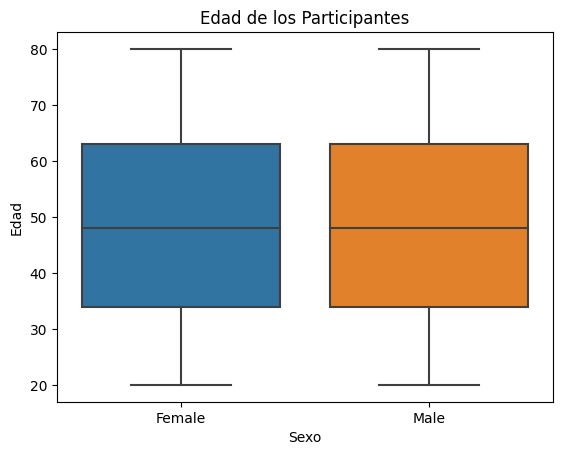

In [8]:
sns.boxplot(main_df, y="Age", x="Sex")

plt.title("Edad de los Participantes")
plt.xlabel("Sexo"), plt.ylabel("Edad");

- Se puede observar que la distribucion de edad es similar para ambos sexos. 
- Con una mediana en torno a los 50 años, el 50 % de la muestra se encuentra entre los 25 y 60 años (aprox). 
- Los participantes, en general, se encuentran entre los 20 y 80 años. No se observan valores atipicos.

----
### `Sexo`

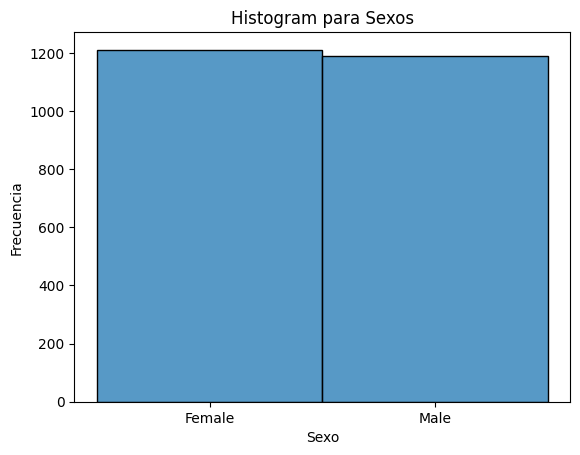

In [9]:
sns.histplot(main_df, x="Sex")

plt.title("Histogram para Sexos")
plt.xlabel("Sexo"), plt.ylabel("Frecuencia");

- La frecuencia de ambos sexos es similar.

----
### `Estado civil`

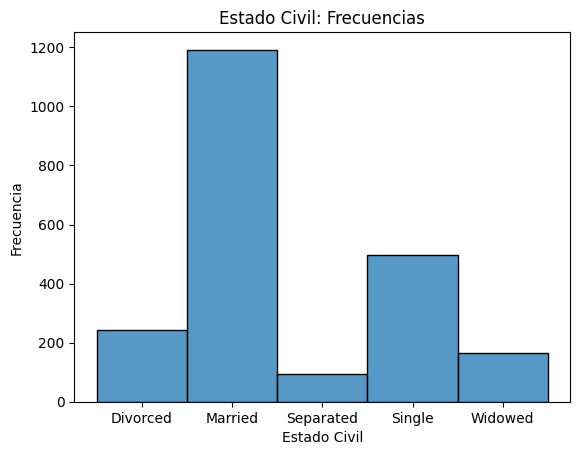

In [10]:
sns.histplot(main_df, x="Marital")

plt.title("Estado Civil: Frecuencias")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Hay un franco predominio de individuos casados.
- Seria interesante agrupar a la muestra en solteros, casados y separados (separados, divorciados, y viudos)?

In [11]:
# Numero de participantes "separados" (separados, divorciados, y viudos)
separated  = main_df["Marital"][(main_df["Marital"] == "Widowed") | (main_df["Marital"] == "Divorced") | (main_df["Marital"] == "Separated")].count()

separated

503

In [12]:
# Porcentaje de "separados" en la muestra
(separated / main_df["Marital"].count()).round(2)

0.23

----
### `Ingresos`

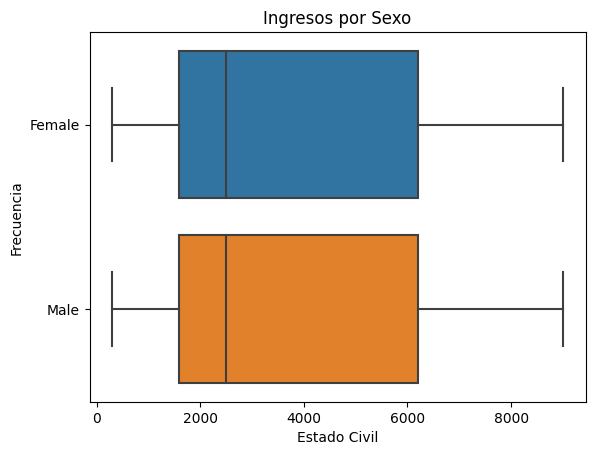

In [13]:
sns.boxplot(main_df, x="Income", y="Sex")

plt.title("Ingresos por Sexo")
plt.xlabel("Estado Civil"), plt.ylabel("Frecuencia");

- Al igual que con la edad, la distribucion de ingresos para ambos sexos es similar.

In [14]:
special_df = main_df.groupby("Sex")["Income"]

special_df.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1159.0,3916.824849,2943.454129,300.0,1600.0,2500.0,6200.0,9000.0
Male,1125.0,4096.355556,2963.438998,300.0,1600.0,2500.0,6200.0,9000.0


- Es llamativa, por lo menos, la paridad de los ingresos, en funcion del sexo, de la muestra en estudio. 

----
### `Etnias`

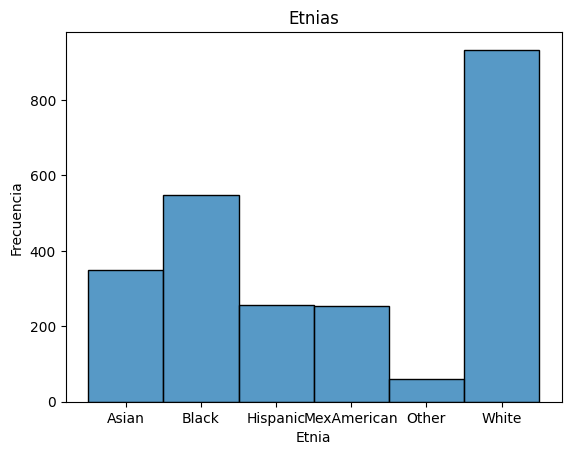

In [15]:
sns.histplot(main_df, x="Race")

plt.title("Etnias")
plt.xlabel("Etnia"), plt.ylabel("Frecuencia");

- La etnia predominante es la blanca.

----
### `Circunferencia Abdominal`

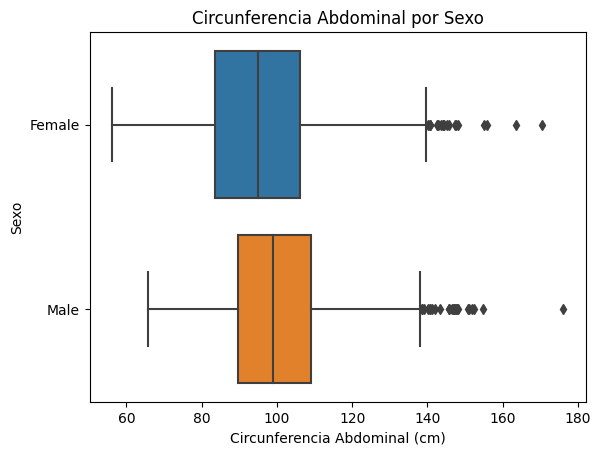

In [16]:
sns.boxplot(main_df, x="WaistCirc", y="Sex")

plt.title("Circunferencia Abdominal por Sexo")
plt.xlabel("Circunferencia Abdominal (cm)"), plt.ylabel("Sexo");

In [17]:
# En general, se pueden encontrar las siguientes medidas
main_df["WaistCirc"].describe()

count    2316.000000
mean       98.307254
std        16.252634
min        56.200000
25%        86.675000
50%        97.000000
75%       107.625000
max       176.000000
Name: WaistCirc, dtype: float64

In [18]:
main_df.groupby("Sex")["WaistCirc"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1162.0,96.341566,16.504544,56.2,83.625,95.0,106.2,170.5
Male,1154.0,100.286568,15.756044,65.8,89.600,99.0,109.0,176.0


- Las mujeres presentan valores minimos mas bajos que los hombres.
- Sin embargo, a medida que los valores incrementan, se vuelven similares.

- `Pregunta:` Existe alguna relacion entre el peso y la edad? Entre el peso y la etnia?

----
### `Indice de Masa Corporal`

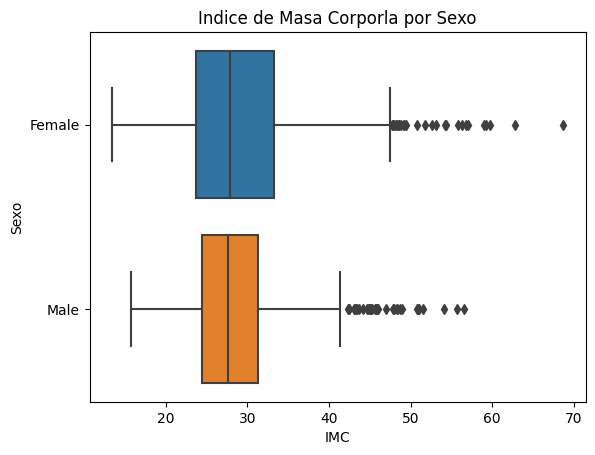

In [19]:
sns.boxplot(main_df, x="BMI", y="Sex")

plt.title("Indice de Masa Corporla por Sexo")
plt.xlabel("IMC"), plt.ylabel("Sexo");

In [20]:
main_df.groupby("Sex")["BMI"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1197.0,29.040267,7.323734,13.4,23.7,27.9,33.3,68.7
Male,1178.0,28.358659,5.898125,15.7,24.4,27.6,31.3,56.6


- Las mujeres presentan no solo un rango mayor, sino una mayor dispersion de los datos.
- Ademas, presentan valores atipicos que superan a los propios del hombre.

- `Pregunta:` Existe alguna relacion entre el IMC y la edad?

<Axes: xlabel='BMI', ylabel='Age'>

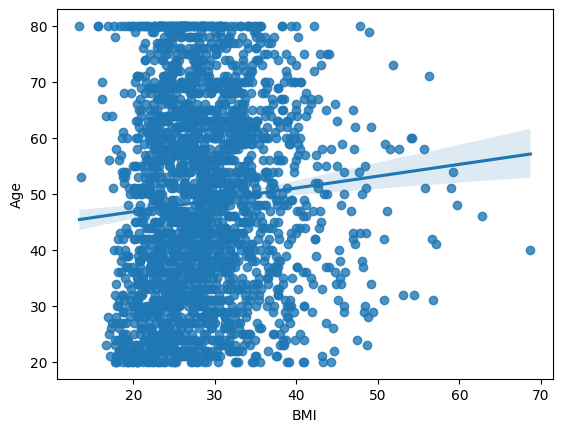

In [21]:
sns.regplot(main_df, x="BMI", y="Age")

- Existen una ligera correlacion positiva entre la edad y el IMC.
- `Pregunta`: Dicha tendencia se acentua en algun sexo?

In [22]:
male_df = main_df[main_df["Sex"] == "Male"]
female_df = main_df[main_df["Sex"] == "Female"]

<Axes: xlabel='BMI', ylabel='Age'>

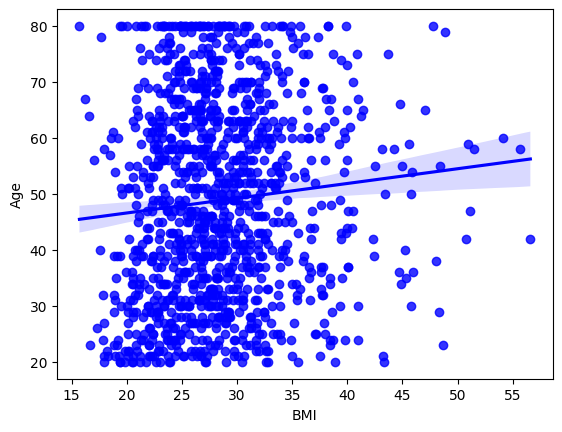

In [23]:
sns.regplot(male_df, x="BMI", y="Age", color="Blue")

<Axes: xlabel='BMI', ylabel='Age'>

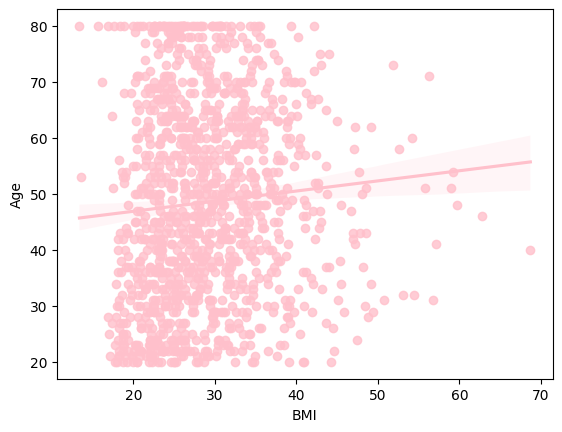

In [24]:
sns.regplot(female_df, x="BMI", y="Age", color="Pink")

- No parece que la correlacion este asociada a algun sexo especifico.

----
### `Albuminuria`

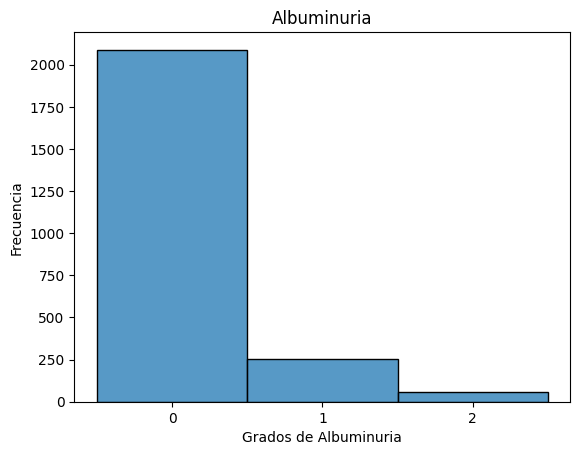

In [25]:
sns.histplot(main_df, x="Albuminuria")

plt.title("Albuminuria")
plt.xlabel("Grados de Albuminuria"), plt.ylabel("Frecuencia");
plt.xticks([0,1,2]);

- La mayoria de los individuos no presenta albuminuria.

- `Pregunta:` Existe alguna relacion entre la albuminuria y la glucosa en sangre?

<Axes: xlabel='BloodGlucose', ylabel='Albuminuria'>

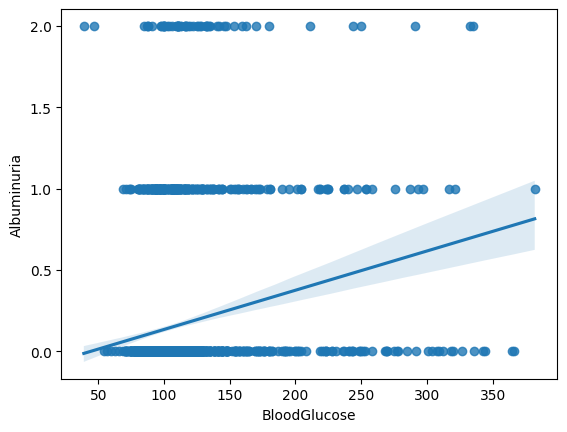

In [26]:
sns.regplot(main_df, x="BloodGlucose", y="Albuminuria")

- Existe una notable correlacion positiva entre la glucosa en sangre y la presencia de albumina en la orina.

----
### `Relacion Albumina/Creatinina`

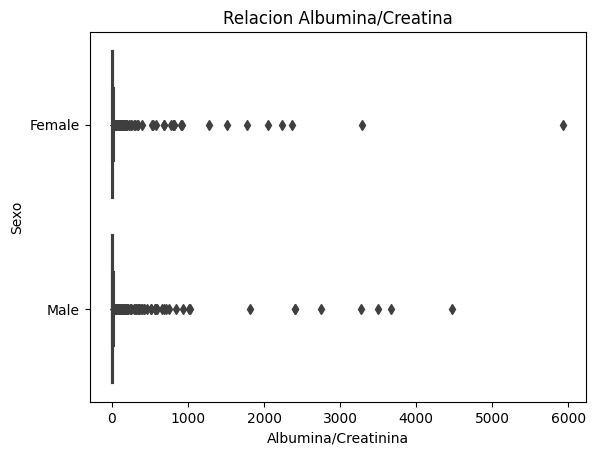

In [27]:
sns.boxplot(main_df, x="UrAlbCr", y="Sex")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatinina"), plt.ylabel("Sexo");

- Se puede observar claramente la existencia de valores atipicos extremos.
- A su vez, dichos valores dificultan la interpretacion de los valores tipicos.

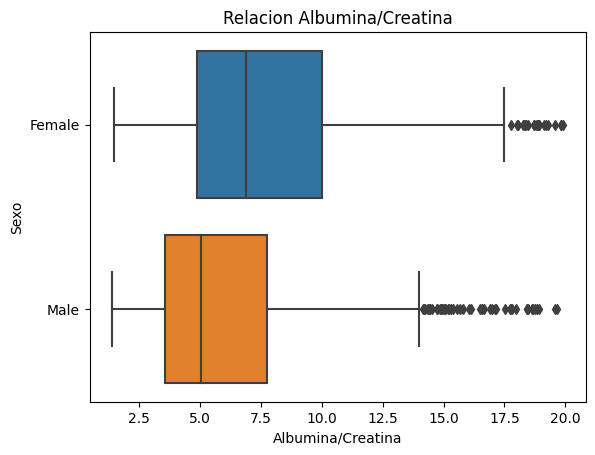

In [28]:
# Limitando la expresion de valores atipicos
sns.boxplot(main_df, x=main_df["UrAlbCr"][main_df["UrAlbCr"] < 20], y="Sex")

plt.title("Relacion Albumina/Creatina")
plt.xlabel("Albumina/Creatina"), plt.ylabel("Sexo");

- Cuando se limitan los datos a aquellos menores de 20, se puede observar mejor las tendencias.
- Reproduciendo pautas anteriores, la mujer presenta una mayor dispersion de sus datos.
- Ademas, las mujeres presentan un mayor rango.

- `Pregunta:` Al igual que con la albuminuria, la relacion urinaria de albumina/creatina se correlaciona con la de glucemia?

<Axes: xlabel='BloodGlucose', ylabel='UrAlbCr'>

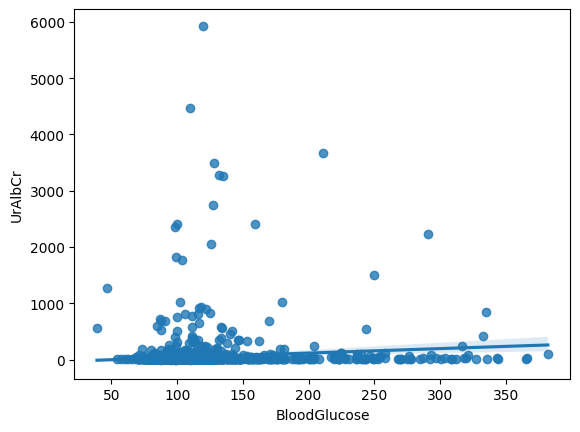

In [29]:
sns.regplot(main_df, x="BloodGlucose", y="UrAlbCr")

- En este caso, la correlacion, si bien positiva, es minima.

- `Pregunta:` Y si se desprecian los datos atipicos?

<Axes: xlabel='BloodGlucose', ylabel='UrAlbCr'>

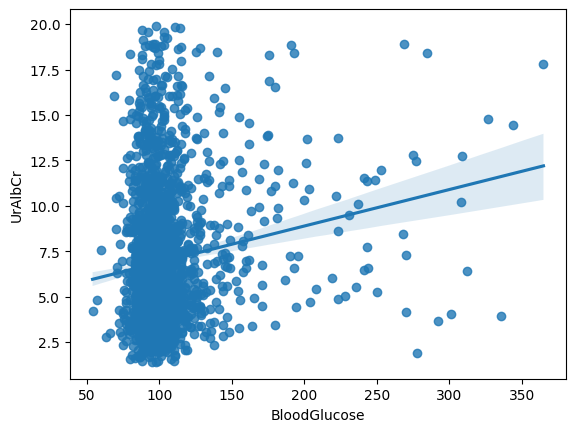

In [30]:
sns.regplot(main_df[main_df["UrAlbCr"] < 20], x="BloodGlucose", y="UrAlbCr")

- Efectivamente, la tendencia a la correlacion positiva mejora cuando se eliminan de la muestra los valores extremos.

----
### `Uricosuria`

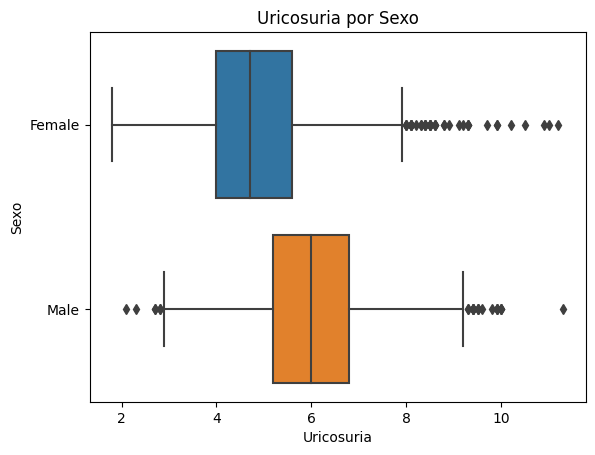

In [31]:
sns.boxplot(main_df, x="UricAcid", y="Sex")

plt.title("Uricosuria por Sexo")
plt.xlabel("Uricosuria"), plt.ylabel("Sexo");

- La dispersion parece similar en ambos casos, teniendo el hombre valores mas elevados que las mujeres tanto en el centro como en los extremos.

In [39]:
main_df.groupby("Sex")["UricAcid"].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,1211.0,4.908836,1.350407,1.8,4.0,4.7,5.6,11.2
Male,1190.0,6.079496,1.278370,2.1,5.2,6.0,6.8,11.3


----
### `Glucemia`

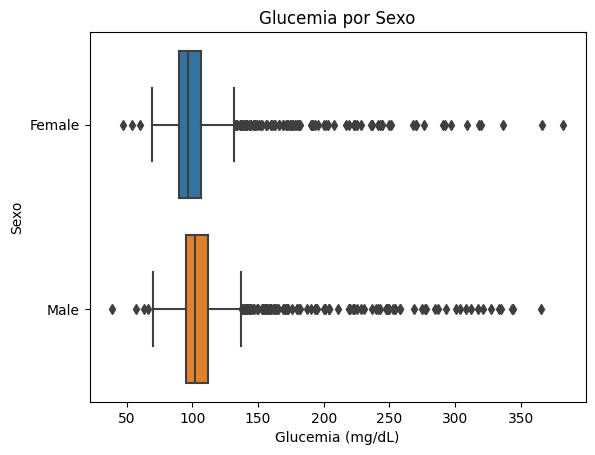

In [43]:
sns.boxplot(main_df, x="BloodGlucose", y="Sex")

plt.title("Glucemia por Sexo")
plt.xlabel("Glucemia (mg/dL)"), plt.ylabel("Sexo");

- La dispersion parece similar, pero tanto en el centro como en los extremos los hombres llevan los valores mas altos.

`Pregunta:` Los valores mas elevados de glucemia se relacionan positivamente con aquellos que tienen sindrome metabolico?

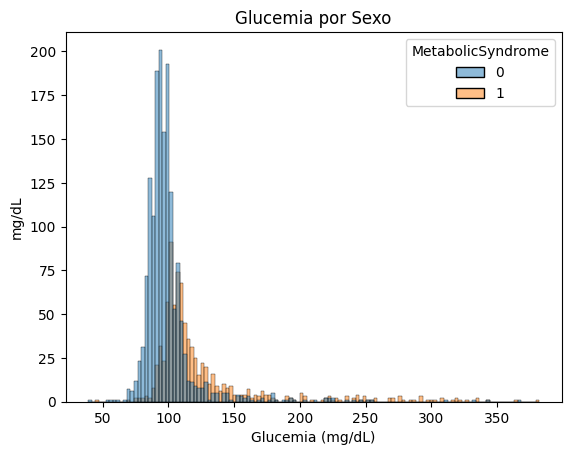

In [51]:
sns.histplot(main_df, x="BloodGlucose", hue="MetabolicSyndrome")

plt.title("Glucemia por Sexo")
plt.xlabel("Glucemia (mg/dL)"), plt.ylabel("mg/dL");

- El analisis visual mejoraria con un poco de zoom...

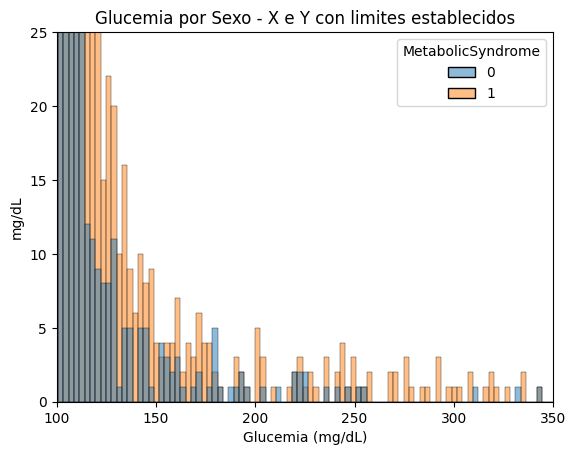

In [56]:
sns.histplot(main_df, x="BloodGlucose", hue="MetabolicSyndrome")

plt.xlim((100,350)); plt.ylim((0,25))

plt.title("Glucemia por Sexo - X e Y con limites establecidos")
plt.xlabel("Glucemia (mg/dL)"), plt.ylabel("mg/dL");

- Efectivamente: A medida que aumenta la glucemia, aumenta el numero de individuos con sindrome metabolico.

----
### `HDL`

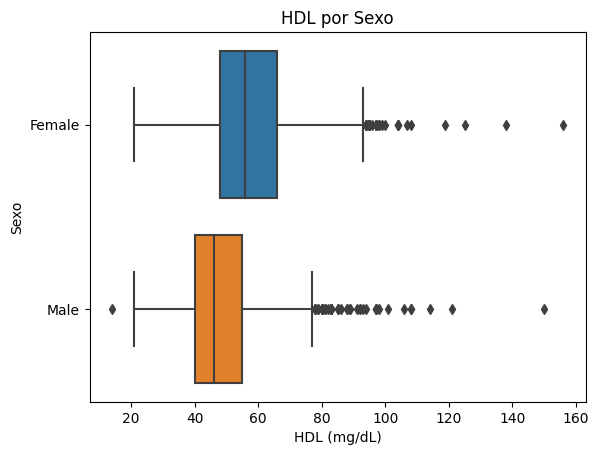

In [58]:
sns.boxplot(main_df, x="HDL", y="Sex")

plt.title("HDL por Sexo")
plt.xlabel("HDL (mg/dL)"), plt.ylabel("Sexo");

- La dispersion es mayor para las mujeres, y tanto en el centro como en el extremo derecho tambien es mayor.

`Pregunta: ` Existe alguna correlacion entre los valores de HDL y Glucemia?

<Axes: xlabel='BloodGlucose', ylabel='HDL'>

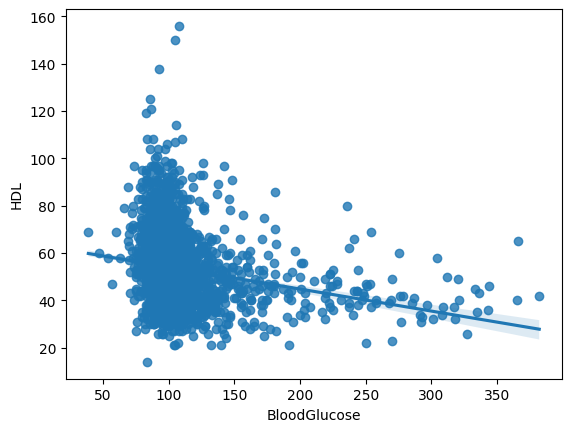

In [61]:
sns.regplot(main_df, x="BloodGlucose", y="HDL")

- En contraste con el resto de los analisis, en este caso la correlacion tiende a ser negativa: esto es, a mayor glucemia, menor HDL.

`Pregunta: ` Como se comporta cada sexo?

<Axes: xlabel='BloodGlucose', ylabel='HDL'>

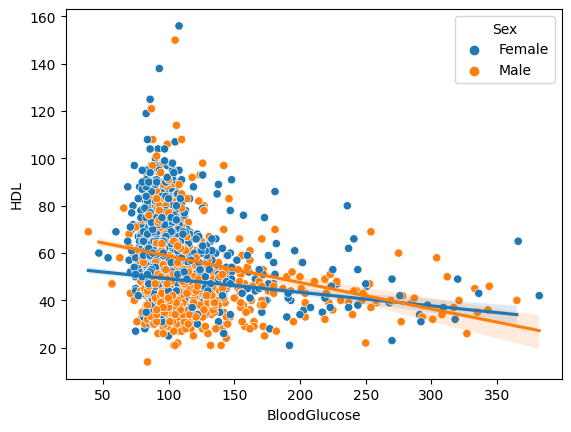

In [68]:
sns.scatterplot(main_df, x="BloodGlucose", y="HDL", hue="Sex")

sns.regplot(data=main_df[main_df["Sex"] == "Male"], x="BloodGlucose", y="HDL", scatter=False)
sns.regplot(data=main_df[main_df["Sex"] == "Female"], x="BloodGlucose", y="HDL", scatter=False)

- La tendencia a la correlacion negativa esta mas acentuada en el caso de los hombres.

----
### `Triglycerides`

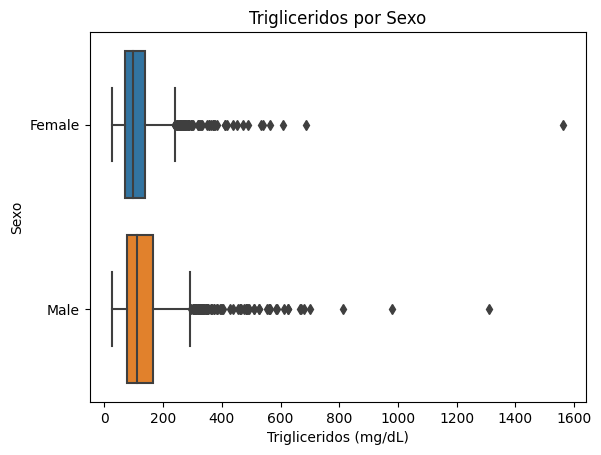

In [70]:
sns.boxplot(main_df, x="Triglycerides", y="Sex")

plt.title("Trigliceridos por Sexo")
plt.xlabel("Trigliceridos (mg/dL)"), plt.ylabel("Sexo");

Seria interesante dejar afuera, de momento, los valores atipicos para mejorar la descripcion.

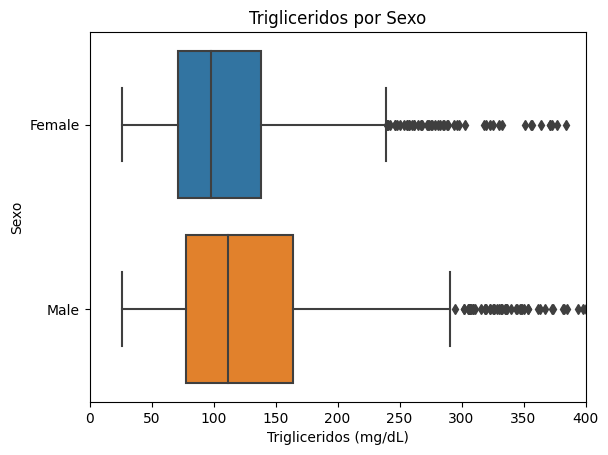

In [72]:
sns.boxplot(main_df, x="Triglycerides", y="Sex")

plt.xlim((0,400))
plt.title("Trigliceridos por Sexo")
plt.xlabel("Trigliceridos (mg/dL)"), plt.ylabel("Sexo");